Program 1

Christian Basso, Patrick McDonald, David Litton

CSC 3310

January 30, 2024

In [1]:
import copy
import math

# Program 1

This code will take in a list of tuples that represent a point with an x and y coordinate. It will create the largest convex hull possible from the points and return the list of all the points that represent the hull.

Here are some array examples:

In [2]:
arr1 = ((0,0), (1, 1), (2, 2), (3, 3), (1, 4), (4, 5), 
        (5, 6), (6, 7), (7, 8), (8, 9), (0, 5), (9, 0), 
        (4, 9), (0, 6), (6, 9), (0, 7), (7, 9), (0, 8), 
        (8, 9), (0, 9), (7, 9), (6, 2))

arr2 = ((15, 5), (8, 29), (4, 22), (26, 19), (10, 5), 
        (21, 7), (19, 7), (30, 25), (14, 28), (19, 12))

arr3 = ((8, 16), (22, 7), (23, 27), (14, 16), (9, 20), 
        (29, 30), (10, 17), (20, 21), (4, 12), (29, 5))

arr4 = ((0, 0), (1, 1), (2, 2), (3, 3)) #This one shouldnt work...

arr5 = ((0, 0), (1, 1)) #This one shouldnt work...

arr6 = ((0, 0), (0, 1), (1, 0), (5, 5))

### Functions

In [3]:
'''
Function to calculate distance between two points
:author: Christian B
'''
def distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

'''
find_center_point(arr) function
returns the center point  as a tuple (x,y)
:param: arr - collection comprised of a series of x,y tuple points
:author: David L
'''
def find_center_point(arr):
    x_points = 0
    y_points = 0
    elements = 0
    for point in arr:
        x_points += point[0]
        y_points += point[1]
        elements += 1
    avg_x = x_points/elements
    avg_y = y_points/elements
    return (avg_x, avg_y)

'''
find_farthest_point(arr, center) function
returns the farthest point in the input arr from the input center
:param: arr - collection comprised of a series of x,y tuple points
:param: center - an x and y coordinate
:author: David L
'''
def find_farthest_point(arr, center):
    # define distance list
    distances = list()
    # calculate distance from center to all points and append to distance list
    for point in arr:
        distances.append(distance(point, center))
        
    # find max distance
    distances.sort(reverse=True)
    farthest_distance = distances[0]
    
    # find index of max distance
    distances.clear()
    for point in arr:
        distances.append(distance(point, center))
    index = distances.index(farthest_distance)
    
    # find and return point
    return arr[index]

#(Christian)
# define function to find most obtuse angle between current point and all other points
    # for each point
        # cacluate angle between current point and all other points
        # Return most obtuse point
'''
Calculate the angle 3 points make.
For the first itteration of the loop the points will be
The absolute center point (calculated), the farthest point, and the first point of intrest.
:author: Christian B
'''
def get_angle(A, B, C):
    # Calculate the lengths of the sides of the triangle
    AB = distance(A, B)
    BC = distance(B, C)
    AC = distance(A, C)
    # Use the law of cosines to calculate the angle at B
    cos_angle_B = (AB**2 + BC**2 - AC**2) / (2 * AB * BC)
    angle_B_radians = math.acos(cos_angle_B)
    angle_B_degrees = round(math.degrees(angle_B_radians))
    return angle_B_degrees
    

### Hull_algorithim
In the following cell our hull algorithim will be defined. This algorithm will take in a array **input_arr** and return/print an array of all points on the hull.

In [4]:
def calculateHull(points):
    # If there are not enough points to make a hull, return -1
    if(len(points) < 3):
        print("Not enough points, need at least 3.")
        return -1
    # Find center point
    center_point = find_center_point(points) # ret (avg_x,avg_y)
    #Find futurest point from the center as a starting point
    farthest_point = find_farthest_point(points, center_point)
    
    # Make the array of all hull points to be returned
    hull_points = []

    # Tracker to see when the algorithim has made a complete hull
    has_reached_initial = False
    #Make a flag that tracks if the points make a straight line
    is_straight_line = True
    # Need 3 points at a time to check angles
    # First is the center point, second is the farthest point, third is the first point of intrest
    a = center_point
    b = farthest_point
    c = None

    # Loop until the algorithim has made a complete hull
    while not has_reached_initial:
        
        # track the largest angle
        largest_angle = -1
        #Holds the point that has the largest angle
        point_largest_angle = []


        # For each point in the list of points

        for p_in in points:

            # Set point of intrest to next point in the lis 
            c = p_in
            # the point of interst could be the furthest point, this skips that one point
            if c is not b:
                #Get the angle between the three points
                angle = get_angle(a, b, c)
                #If the angle is not 180, the points do not make a straight line
                if angle != 180 and angle != 0:
                    # Update the straight line flag
                    is_straight_line = False
                # If the angle is larger than the current largest angle
                if abs(angle) > largest_angle:
                    # Update the largest angle and the point of intrest
                    largest_angle = angle
                    # Set the point of intrest to the point with the largest angle
                    point_largest_angle = c
                #If the current angle is the same as the largest angle-----This fixes the straight line issue
                elif abs(angle) == largest_angle:
                    #If the angle is the same as the largest angle, check the distance
                    #If the distance is shorter, update the point of intrest
                    if distance(b, c) < distance(b, point_largest_angle):
                        point_largest_angle = c
                    


        # If the hull has made it all the way around, set flag to true
        if (point_largest_angle[0] is farthest_point[0] and point_largest_angle[1] is farthest_point[1]):
            has_reached_initial = True
        # Add the most recent hull point to the list of hull points
        hull_points.append(point_largest_angle)

        #Update the points for the next itteration
        a = b
        b = point_largest_angle
        # print(a, b)
        c = None
        
        #If the hull points make a straight line, return -1
        if is_straight_line:
            print("The points make a straight line, no hull can be made.")
            return -1
    return hull_points
    
    

In [5]:
calculateHull(arr2)

[(14, 28), (8, 29), (4, 22), (10, 5), (15, 5), (21, 7), (30, 25)]

#### Function to visualize hull

In [6]:
import matplotlib.pyplot as plt

def plot_points(arr, hull_points):
    # Extract x and y coordinates from the arr
    x = [point[0] for point in arr]
    y = [point[1] for point in arr]

    # Plot the points
    plt.scatter(x, y)

    plt.show()

    # Extract x and y coordinates from the arr
    x = [point[0] for point in arr]
    y = [point[1] for point in arr]

    # Plot the points
    plt.scatter(x, y)

    # Extract x and y coordinates from the hull_points
    hull_x = [point[0] for point in hull_points]
    hull_y = [point[1] for point in hull_points]
    plt.scatter(hull_x, hull_y, color = 'red')


    # Connect the lines all the way around
    hull_x.append(hull_x[0])
    hull_y.append(hull_y[0])

    # Plot the hull points as a connected line
    plt.plot(hull_x, hull_y, color='red')

    # Add labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Plot of Points with Hull')

    # Show the plot
    plt.show()
    

        

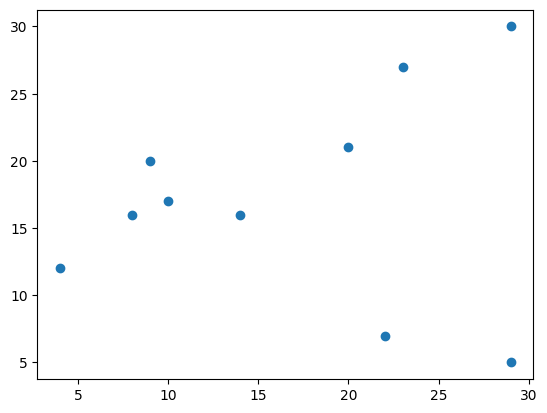

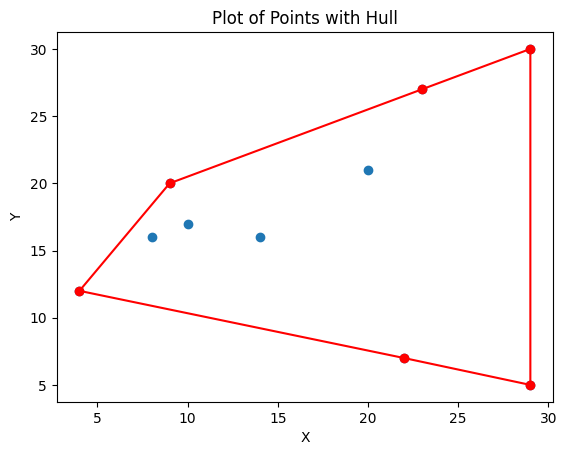

In [7]:
plot_points(arr3, calculateHull(arr3))